# Supply Chain Shipment Pricing Data - Data Analysis

<h3>Importing libraries</h3>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<h3>Data Collection</h3>

In [2]:
print('Wait 1 secs.....')
df = pd.read_csv('https://raw.githubusercontent.com/rajeevratan84/data-analyst-bootcamp/master/SCMS_Delivery_History_Dataset.csv')
print('Dataset Successfully Imported')

Wait 1 secs.....
Dataset Successfully Imported


<h3>Data Cleaning</h3>

<h5>size of the dataset</h5>

In [3]:
df.shape

(10324, 33)

<h5>first 5 rows</h5>

In [4]:
df.head()

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,...,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
0,1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,...,30,19,551.0,29.00,0.97,Ranbaxy Fine Chemicals LTD,Yes,13,780.34,NaN
1,3,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,...,240,1000,6200.0,6.20,0.03,"Aurobindo Unit III, India",Yes,358,4521.5,NaN
2,4,100-CI-T01,Pre-PQ Process,SCMS-20,ASN-14,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,...,100,500,40000.0,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,Yes,171,1653.78,NaN
3,15,108-VN-T01,Pre-PQ Process,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,31920,127360.8,3.99,0.07,"Ranbaxy, Paonta Shahib, India",Yes,1855,16007.06,NaN
4,16,108-VN-T01,Pre-PQ Process,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,38000,121600.0,3.20,0.05,"Aurobindo Unit III, India",Yes,7590,45450.08,NaN


<h5>bottom 5 rows</h5>

In [5]:
df.tail()

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,...,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
10319,86818,103-ZW-T30,FPQ-15197,SO-50020,DN-4307,Zimbabwe,PMO - US,From RDC,N/A - From RDC,Truck,...,60,166571,599655.60,3.60,0.06,"Mylan, H-12 & H-13, India",No,See DN-4307 (ID#:83920),See DN-4307 (ID#:83920),705.79
10320,86819,104-CI-T30,FPQ-15259,SO-50102,DN-4313,Côte d'Ivoire,PMO - US,From RDC,N/A - From RDC,Truck,...,60,21072,137389.44,6.52,0.11,Hetero Unit III Hyderabad IN,No,See DN-4313 (ID#:83921),See DN-4313 (ID#:83921),161.71
10321,86821,110-ZM-T30,FPQ-14784,SO-49600,DN-4316,Zambia,PMO - US,From RDC,N/A - From RDC,Truck,...,30,514526,5140114.74,9.99,0.33,Cipla Ltd A-42 MIDC Mahar. IN,No,Weight Captured Separately,Freight Included in Commodity Cost,5284.04
10322,86822,200-ZW-T30,FPQ-16523,SO-51680,DN-4334,Zimbabwe,PMO - US,From RDC,N/A - From RDC,Truck,...,60,17465,113871.80,6.52,0.11,Mylan (formerly Matrix) Nashik,Yes,1392,Freight Included in Commodity Cost,134.03
10323,86823,103-ZW-T30,FPQ-15197,SO-50022,DN-4336,Zimbabwe,PMO - US,From RDC,N/A - From RDC,Truck,...,60,36639,72911.61,1.99,0.03,"Cipla, Goa, India",No,Weight Captured Separately,Freight Included in Commodity Cost,85.82


<h5>checking all columns names</h5>

In [6]:
df.columns

Index(['ID', 'Project Code', 'PQ #', 'PO / SO #', 'ASN/DN #', 'Country',
       'Managed By', 'Fulfill Via', 'Vendor INCO Term', 'Shipment Mode',
       'PQ First Sent to Client Date', 'PO Sent to Vendor Date',
       'Scheduled Delivery Date', 'Delivered to Client Date',
       'Delivery Recorded Date', 'Product Group', 'Sub Classification',
       'Vendor', 'Item Description', 'Molecule/Test Type', 'Brand', 'Dosage',
       'Dosage Form', 'Unit of Measure (Per Pack)', 'Line Item Quantity',
       'Line Item Value', 'Pack Price', 'Unit Price', 'Manufacturing Site',
       'First Line Designation', 'Weight (Kilograms)', 'Freight Cost (USD)',
       'Line Item Insurance (USD)'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10324 entries, 0 to 10323
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            10324 non-null  int64  
 1   Project Code                  10324 non-null  object 
 2   PQ #                          10324 non-null  object 
 3   PO / SO #                     10324 non-null  object 
 4   ASN/DN #                      10324 non-null  object 
 5   Country                       10324 non-null  object 
 6   Managed By                    10324 non-null  object 
 7   Fulfill Via                   10324 non-null  object 
 8   Vendor INCO Term              10324 non-null  object 
 9   Shipment Mode                 9964 non-null   object 
 10  PQ First Sent to Client Date  10324 non-null  object 
 11  PO Sent to Vendor Date        10324 non-null  object 
 12  Scheduled Delivery Date       10324 non-null  object 
 13  D

<h5>checking null values</h5>

In [8]:
df.isnull().sum()

ID                                 0
Project Code                       0
PQ #                               0
PO / SO #                          0
ASN/DN #                           0
Country                            0
Managed By                         0
Fulfill Via                        0
Vendor INCO Term                   0
Shipment Mode                    360
PQ First Sent to Client Date       0
PO Sent to Vendor Date             0
Scheduled Delivery Date            0
Delivered to Client Date           0
Delivery Recorded Date             0
Product Group                      0
Sub Classification                 0
Vendor                             0
Item Description                   0
Molecule/Test Type                 0
Brand                              0
Dosage                          1736
Dosage Form                        0
Unit of Measure (Per Pack)         0
Line Item Quantity                 0
Line Item Value                    0
Pack Price                         0
U

<h5>Droping null values</h5>

In [9]:
df = df.dropna()

<h5>Checking again all the null value is deleted from the dataset</h5>

In [10]:
df.isnull().sum()

ID                              0
Project Code                    0
PQ #                            0
PO / SO #                       0
ASN/DN #                        0
Country                         0
Managed By                      0
Fulfill Via                     0
Vendor INCO Term                0
Shipment Mode                   0
PQ First Sent to Client Date    0
PO Sent to Vendor Date          0
Scheduled Delivery Date         0
Delivered to Client Date        0
Delivery Recorded Date          0
Product Group                   0
Sub Classification              0
Vendor                          0
Item Description                0
Molecule/Test Type              0
Brand                           0
Dosage                          0
Dosage Form                     0
Unit of Measure (Per Pack)      0
Line Item Quantity              0
Line Item Value                 0
Pack Price                      0
Unit Price                      0
Manufacturing Site              0
First Line Des

<h5>Checking Duplicate rows</h5>

In [11]:
df.duplicated().sum()

0

<p> We have all unique value in our dataset</p>

<h5>Checking datatypes of each column</h5>

In [12]:
df.dtypes

ID                                int64
Project Code                     object
PQ #                             object
PO / SO #                        object
ASN/DN #                         object
Country                          object
Managed By                       object
Fulfill Via                      object
Vendor INCO Term                 object
Shipment Mode                    object
PQ First Sent to Client Date     object
PO Sent to Vendor Date           object
Scheduled Delivery Date          object
Delivered to Client Date         object
Delivery Recorded Date           object
Product Group                    object
Sub Classification               object
Vendor                           object
Item Description                 object
Molecule/Test Type               object
Brand                            object
Dosage                           object
Dosage Form                      object
Unit of Measure (Per Pack)        int64
Line Item Quantity                int64


<h5>Statistics of the numeric column</h5>

In [13]:
df.describe()

,ID,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Line Item Insurance (USD)
count,8158.000000,8158.000000,8158.000000,8.158000e+03,8158.000000,8158.000000,8158.000000
mean,56644.616573,80.203972,22091.348492,1.670237e+05,12.408811,0.212851,251.326639
std,31253.921647,81.296579,43990.580533,3.758129e+05,17.059437,0.285822,536.131657
min,108.000000,5.000000,1.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,21990.250000,30.000000,560.000000,4.221860e+03,3.500000,0.060000,6.500000
50%,73486.000000,60.000000,4427.500000,2.934300e+04,7.645000,0.140000,45.545000
75%,84306.750000,60.000000,24096.750000,1.640927e+05,13.247500,0.260000,239.757500
max,86823.000000,1000.000000,619999.000000,5.951990e+06,306.880000,14.040000,7708.440000


<h5>Unique Country Names</h5>

In [14]:
df['Country'].unique()

array(["Côte d'Ivoire", 'Vietnam', 'Ethiopia', 'South Africa', 'Tanzania',
       'Nigeria', 'Haiti', 'Rwanda', 'Uganda', 'Namibia', 'Guyana',
       'Zambia', 'Mozambique', 'Zimbabwe', 'Swaziland', 'Ghana',
       'Lebanon', 'Kenya', 'Dominican Republic', 'Malawi', 'Congo, DRC',
       'Benin', 'Cameroon', 'Guatemala', 'Togo', 'Angola', 'Afghanistan',
       'Burkina Faso', 'South Sudan', 'Senegal', 'Botswana', 'Burundi',
       'Libya', 'Belize'], dtype=object)

<h5>Unique Shipment Mode</h5>

In [15]:
df['Shipment Mode'].unique()

array(['Air', 'Truck', 'Air Charter', 'Ocean'], dtype=object)

<h3>Exploratory Data Analysis</h3>

<h5>Data Labels function</h5>

In [16]:
def show_values(axs, orient="v", space=.01):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{:.1f}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                value = '{:.1f}'.format(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)

<h5>Top 10 countries Wise Count</h5>

In [17]:
df_Country = df['Country'].value_counts().reset_index().head(10)

In [18]:
df_Country

,index,Country
0,South Africa,1364
1,Nigeria,952
2,Côte d'Ivoire,827
3,Uganda,724
4,Vietnam,661
5,Haiti,549
6,Mozambique,506
7,Zimbabwe,471
8,Zambia,470
9,Tanzania,374


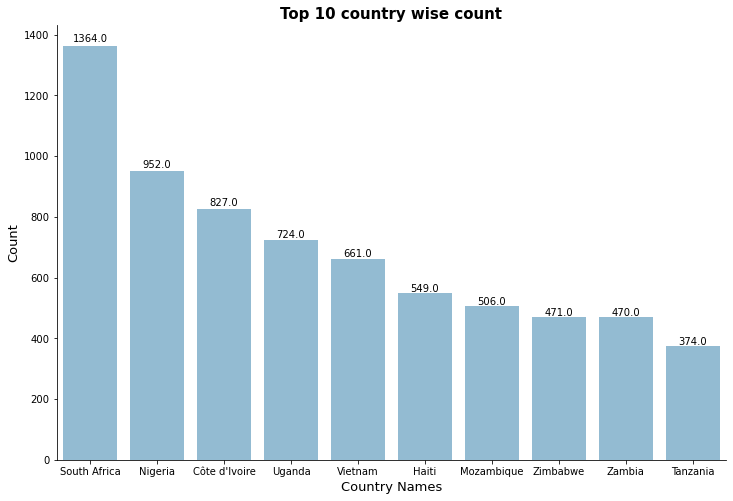

In [19]:
plt.figure(figsize=(12,8))
p=sns.barplot(x= df_Country['index'], y=df_Country['Country'],color='#89bedc',ci=None)
plt.title('Top 10 country wise count',fontsize=15,weight='bold')
plt.xlabel('Country Names',fontsize=13)
plt.ylabel('Count',fontsize=13)
sns.despine()
show_values(p)
plt.show()

<h3>Total Pack Price for Top 15 Countries with graph</h3>

In [20]:
df_pack_price = df.groupby('Country')['Pack Price'].sum().nlargest(15).reset_index()

In [21]:
df_pack_price

,Country,Pack Price
0,South Africa,23479.74
1,Vietnam,11015.11
2,Nigeria,10293.74
3,Côte d'Ivoire,10174.96
4,Uganda,9781.99
5,Mozambique,5782.10
6,Haiti,5029.42
7,Tanzania,4727.47
8,Zambia,3780.12
9,Rwanda,3721.67


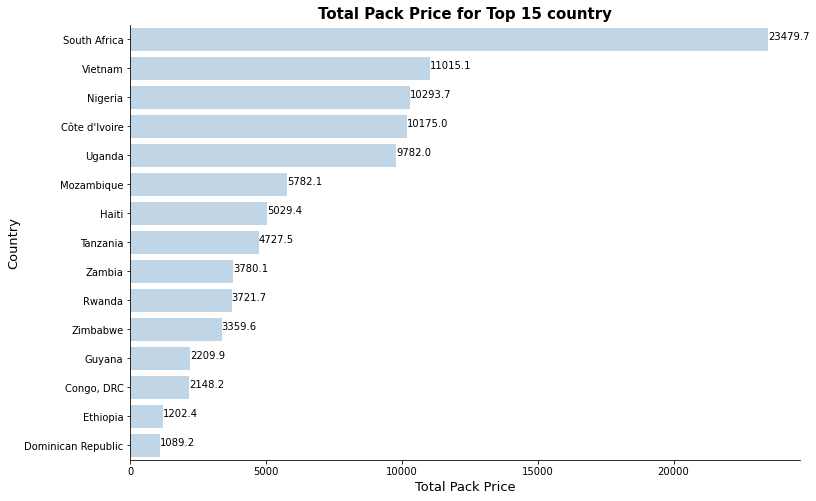

In [22]:
plt.figure(figsize=(12,8))
p=sns.barplot(x= df_pack_price['Pack Price'], y=df_pack_price['Country'],color='#bad6eb',ci=None)
plt.title('Total Pack Price for Top 15 country',fontsize=15,weight='bold')
plt.xlabel('Total Pack Price',fontsize=13)
plt.ylabel('Country',fontsize=13)
sns.despine()
show_values(p,"h",space=0)
plt.show()

<h3>First Line Designation Wise Count</h3>

In [23]:
df.head()

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,...,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
21,108,104-CI-T01,Pre-PQ Process,SCMS-698,ASN-727,Côte d'Ivoire,PMO - US,Direct Drop,CIP,Air,...,60,5513,140581.5,25.50,0.42,"BMS Meymac, France",Yes,2126,Freight Included in Commodity Cost,224.93
22,115,108-VN-T01,Pre-PQ Process,SCMS-753,ASN-781,Vietnam,PMO - US,Direct Drop,EXW,Air,...,240,1000,1920.0,1.92,0.01,"Aurobindo Unit III, India",Yes,941,4193.49,3.07
23,116,108-VN-T01,Pre-PQ Process,SCMS-759,ASN-632,Vietnam,PMO - US,Direct Drop,FCA,Air,...,120,500,41095.0,82.19,0.68,ABBVIE Ludwigshafen Germany,Yes,117,1767.38,65.75
29,161,117-ET-T01,Pre-PQ Process,SCMS-11070,ASN-916,Ethiopia,PMO - US,Direct Drop,EXW,Air,...,60,64000,99200.0,1.55,0.03,"Aurobindo Unit III, India",Yes,4228,12237.61,158.72
32,269,108-VN-T01,Pre-PQ Process,SCMS-14190,ASN-1192,Vietnam,PMO - US,Direct Drop,EXW,Air,...,30,1000,17000.0,17.00,0.57,Gilead(Nycomed) Oranienburg DE,Yes,76,2282.57,27.20


In [24]:
df_first_line = df['First Line Designation'].value_counts().reset_index()

In [25]:
df_first_line

,index,First Line Designation
0,Yes,5242
1,No,2916


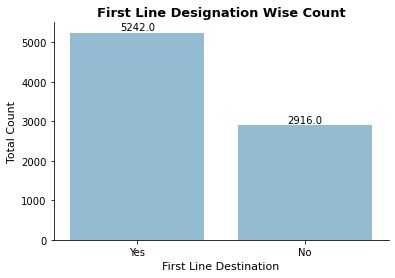

In [26]:
plt.figure(figsize=(6,4))
p=sns.barplot(x= df_first_line['index'], y=df_first_line['First Line Designation'],color='#89bedc',ci=None)
plt.title('First Line Designation Wise Count',fontsize=13,weight='bold')
plt.xlabel('First Line Destination',fontsize=11)
plt.ylabel('Total Count',fontsize=11)
sns.despine()
show_values(p)
plt.show()

<h3>Shipment Mode percentage wise Pie Chart</h3>

<p>['#dbe9f6', '#bad6eb', '#89bedc', '#539ecd', '#2b7bba', '#0b559f']</P>

In [27]:
df_shipment = df['Shipment Mode'].value_counts()

In [28]:
df_shipment

Air            4361
Truck          2780
Air Charter     650
Ocean           367
Name: Shipment Mode, dtype: int64

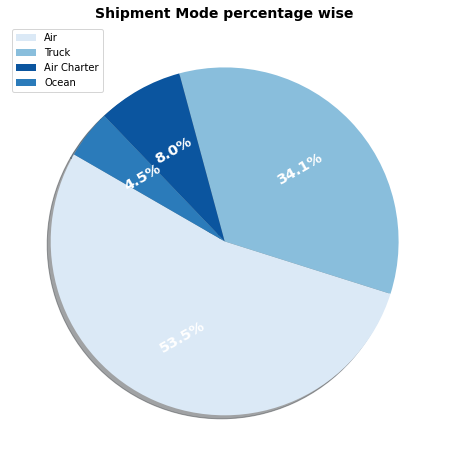

In [29]:
plt.figure(figsize=(10,8))
plt.pie(df_shipment,labels=df_shipment.index,autopct='%1.1f%%',
       colors=['#dbe9f6', '#89bedc',  '#0b559f', '#2b7bba'],
       textprops={'size':'x-large','fontweight':'bold','rotation':'30','color':'w'},
       startangle=150,shadow=True)
plt.title('Shipment Mode percentage wise',fontsize=14,weight='bold')
plt.legend()
plt.show()

<h3>Unique Manufacturing Site Names</h3>

In [30]:
man = df['Manufacturing Site'].unique()

In [31]:
for i in range(len(man)):
    print(i+1,'Manufacturing Site Name :',man[i])

1 Manufacturing Site Name : BMS Meymac, France
2 Manufacturing Site Name : Aurobindo Unit III, India
3 Manufacturing Site Name : ABBVIE Ludwigshafen Germany
4 Manufacturing Site Name : Gilead(Nycomed) Oranienburg DE
5 Manufacturing Site Name : Ranbaxy, Paonta Shahib, India
6 Manufacturing Site Name : Mylan (formerly Matrix) Nashik
7 Manufacturing Site Name : Roche Basel
8 Manufacturing Site Name : GSK Ware (UK)
9 Manufacturing Site Name : Novartis Pharma AG, Switzerland
10 Manufacturing Site Name : BI, Ingelheim, Germany
11 Manufacturing Site Name : Ipca Dadra/Nagar Haveli IN
12 Manufacturing Site Name : MSD, Haarlem, NL
13 Manufacturing Site Name : Aspen-OSD, Port Elizabeth, SA
14 Manufacturing Site Name : ABBVIE (Abbott) Logis. UK
15 Manufacturing Site Name : Gland Pharma Ltd Pally Factory
16 Manufacturing Site Name : Cipla, Goa, India
17 Manufacturing Site Name : GSK Mississauga (Canada)
18 Manufacturing Site Name : GSK Aranda
19 Manufacturing Site Name : Hetero Unit III Hyderabad I

<h3>Top 10 Manufacturing Site for all Shipment Mode with Graph</h3>

In [32]:
df_manuf = df['Manufacturing Site'].value_counts().nlargest(10).reset_index()

In [33]:
df_manuf

,index,Manufacturing Site
0,"Aurobindo Unit III, India",2978
1,Mylan (formerly Matrix) Nashik,1407
2,Hetero Unit III Hyderabad IN,868
3,"Cipla, Goa, India",624
4,"Strides, Bangalore, India.",528
5,ABBVIE Ludwigshafen Germany,350
6,ABBVIE (Abbott) Logis. UK,204
7,"BMS Meymac, France",129
8,"Aspen-OSD, Port Elizabeth, SA",125
9,"MSD, Haarlem, NL",117


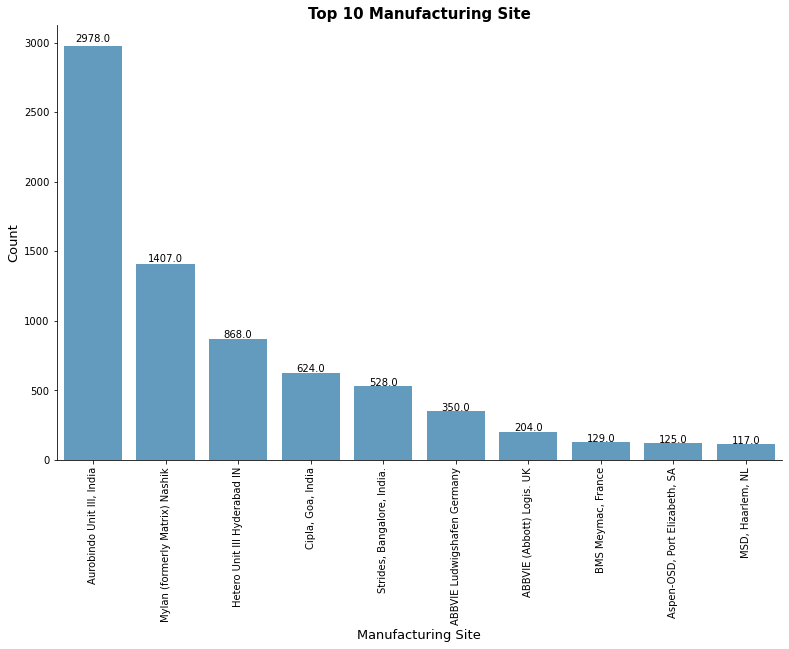

In [34]:
plt.figure(figsize=(13,8))
p=sns.barplot(x= df_manuf['index'], y=df_manuf['Manufacturing Site'],color='#539ecd',ci=None)
plt.title('Top 10 Manufacturing Site',fontsize=15,weight='bold')
plt.xlabel('Manufacturing Site',fontsize=13)
plt.xticks(rotation=90)
plt.ylabel('Count',fontsize=13)
sns.despine()
show_values(p)
plt.show()

<h3>Top 10 Manufacturing Site for Air Shipment Mode with Graph</h3>

In [35]:
df_air = df[df['Shipment Mode'] == 'Air']

In [36]:
df_manuf1 = df_air['Manufacturing Site'].value_counts().nlargest(10).reset_index()

In [37]:
df_manuf1

,index,Manufacturing Site
0,"Aurobindo Unit III, India",1641
1,Mylan (formerly Matrix) Nashik,695
2,Hetero Unit III Hyderabad IN,417
3,ABBVIE Ludwigshafen Germany,281
4,"Cipla, Goa, India",264
5,"Strides, Bangalore, India.",251
6,ABBVIE (Abbott) Logis. UK,147
7,"MSD, Haarlem, NL",90
8,"BMS Meymac, France",83
9,"Aspen-OSD, Port Elizabeth, SA",80


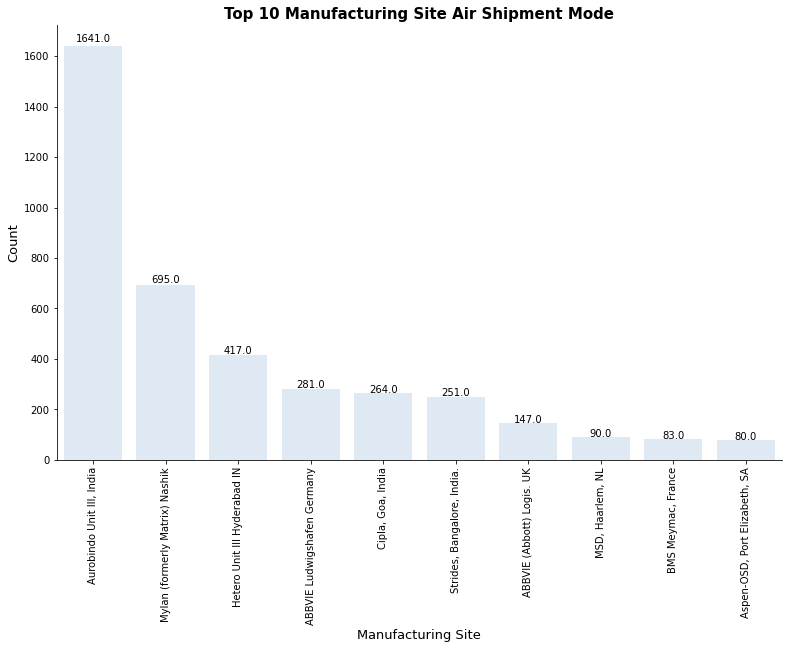

In [38]:
plt.figure(figsize=(13,8))
p=sns.barplot(x= df_manuf1['index'], y=df_manuf1['Manufacturing Site'],color='#dbe9f6',ci=None)
plt.title('Top 10 Manufacturing Site Air Shipment Mode',fontsize=15,weight='bold')
plt.xlabel('Manufacturing Site',fontsize=13)
plt.xticks(rotation=90)
plt.ylabel('Count',fontsize=13)
sns.despine()
show_values(p)
plt.show()

<h3>Shipment Max, Min and Mean value for Air</h3>

In [39]:
print ("The Max Air Shipment Mode is :",df_air['Unit of Measure (Per Pack)'].max())
print ("The Min Air Shipment is :",df_air['Unit of Measure (Per Pack)'].min())
ItemTypeMean = df_air['Unit of Measure (Per Pack)'].mean()
print ("The Mean Air Shipment is :", round(ItemTypeMean,2))

The Max Air Shipment Mode is : 1000
The Min Air Shipment is : 5
The Mean Air Shipment is : 89.33


<h3>Shipment Mode and Pack Price in Bar Plot Graph</h3>

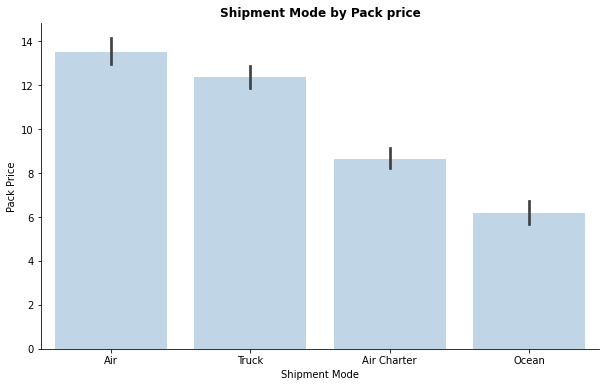

In [40]:
plt.figure(figsize=(10,6))
sns.barplot(x=df['Shipment Mode'],y=df['Pack Price'],color='#bad6eb')
plt.title('Shipment Mode by Pack price',fontsize=12,weight='bold')
sns.despine()
plt.show()